## Importing Required Libraries

In [1]:
# Importing necessary libraries and modules
import sys, os  
import warnings  

# Data Manipulations and Visualisations
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Scikit-learn modules for machine learning
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  
from sklearn.cluster import KMeans 

# TensorFlow modules for deep learning
import tensorflow as tf  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  

# Ignore all warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

2024-04-19 19:42:43.033502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Reading the Dataset

After Inspecting the dataset, we got to know about there are no headers present in the files.

In [2]:
X_train = pd.read_csv('x_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).squeeze()
X_test = pd.read_csv('x_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).squeeze()

We use Squeeze Function from Pandas Library to be able to convert dataframe into a series.

## Exploratory Data Analysis

In [25]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_test.head()


0    0
1    4
2    2
3    2
4    2
Name: 0, dtype: int64

In [27]:
y_test.unique()

array([0, 4, 2, 1, 3])

We can see that only a total of 5 classes are available in the dataset.

### Training a Shallow Decision Tree

In [3]:
# Initialize the classifier
dt_classifier = DecisionTreeClassifier(max_depth=3) # Limiting the depth

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

print("CV Scores for Decision Tree:", cv_scores)
print("Average CV Score:", cv_scores.mean())

CV Scores for Decision Tree: [0.68894259 0.69041667 0.69233333 0.69075    0.68716667]
Average CV Score: 0.6899218509568648


The cross-validation scores for the Decision Tree model are consistent, ranging from 0.687 to 0.692, with an average score of approximately 0.690

### Visualising the Decision Tree Classifier

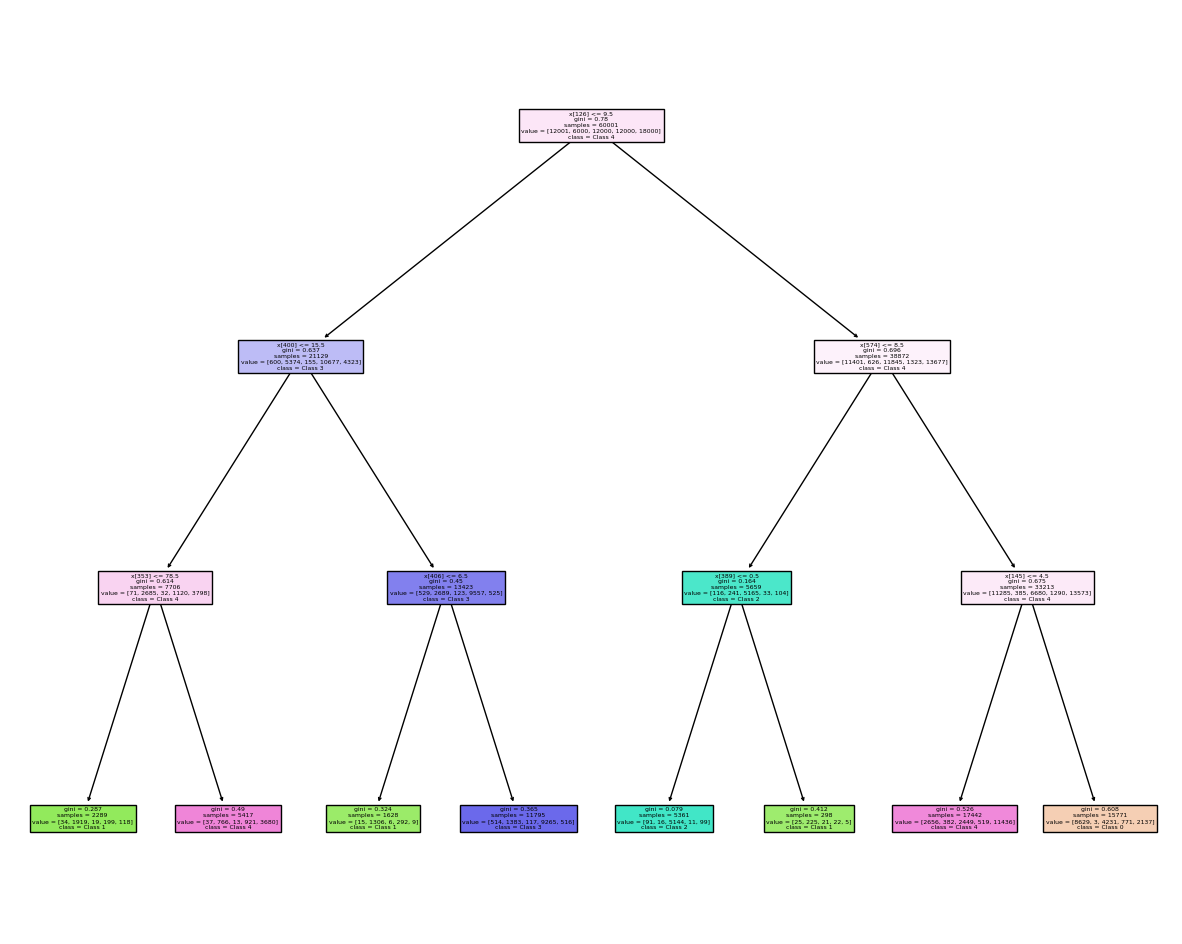

In [4]:
# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Find unique class labels in y_train
unique_classes = np.unique(y_train)

# Set class names based on unique class labels
class_names = [f"Class {label}" for label in unique_classes]

# Plot the decision tree
plt.figure(figsize=(15, 12))
plot_tree(dt_classifier, class_names=class_names, filled=True)
plt.show()

### Bagging Classifier

In [5]:
# Initialize the Bagging classifier with a Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Perform 5-fold cross-validation
bagging_cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=5)

print("CV Scores for Bagging:", bagging_cv_scores)
print("Average CV Score:", bagging_cv_scores.mean())

CV Scores for Bagging: [0.69619198 0.69925    0.69858333 0.697      0.6985    ]
Average CV Score: 0.6979050634669333


The cross-validation scores for Bagging method indicate consistent performance across folds, with an average score of 0.6979.

### Boosting Classifier

In [6]:
# Initialize the Boosting classifier with a Decision Tree as the base estimator
boosting_model = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Perform 5-fold cross-validation
boosting_cv_scores = cross_val_score(boosting_model, X_train, y_train, cv=5)

print("CV Scores for Boosting:", boosting_cv_scores)
print("Average CV Score:", boosting_cv_scores.mean())

CV Scores for Boosting: [0.64361303 0.67325    0.6395     0.69558333 0.65233333]
Average CV Score: 0.6608559397827959


The cross-validation scores for Boosting method show variability but with an average score of 0.66085, suggesting moderate performance.

### Comparing the performance of models on test data

In [7]:
# Fit the baseline model
dt_classifier.fit(X_train, y_train)
baseline_score = dt_classifier.score(X_test, y_test)

# Fit the bagging model
bagging_model.fit(X_train, y_train)
bagging_score = bagging_model.score(X_test, y_test)

# Fit the boosting model
boosting_model.fit(X_train, y_train)
boosting_score = boosting_model.score(X_test, y_test)

print("Test Score for Baseline Model:", baseline_score)
print("Test Score for Bagging Model:", bagging_score)
print("Test Score for Boosting Model:", boosting_score)

Test Score for Baseline Model: 0.6877312268773123
Test Score for Bagging Model: 0.6927307269273073
Test Score for Boosting Model: 0.678032196780322


| Decision Trees Model                         | Average CV Score | Test Score |
|-------------------------------|------------------|------------|
| Baseline | 0.6899           | 0.6877     |
| Bagging     | 0.6979           | 0.6927     |
| Boosting    | 0.6609           | 0.6780     |

**Observations:**  
- The Bagging method yields the highest scores both in cross-validation and on the test set, making it the most effective approach for this dataset.
- The Baseline Decision Tree model performs moderately well, suggesting that the dataset might not require complex models to achieve reasonable accuracy.
- The Boosting method shows the lowest performance according to the average CV score and the test score, indicating it may not be the best fit for this particular dataset or might need more fine-tuning.


**Conclusion:** Bagging with Decision Trees outperforms both the Baseline Decision Tree and Boosting methods on this dataset.

### Normalising the Dataset

In [28]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
x_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
x_test_normalized = scaler.transform(X_test)

We are standardizing the features of a dataset before training a machine learning model.

1. `StandardScaler()` from scikit-learn to standardize the features.
2. `fit_transform()` to the training data (`X_train`) calculates the mean and standard deviation of each feature and then standardizes the training data.
3. `transform()` on the test data (`X_test`) standardizes it based on the parameters learned from the training data.

This preprocessing step ensures that all features have a mean of 0 and a standard deviation of 1, which can improve the performance and convergence of many machine learning algorithms.


### Simple MLP model.

In [ ]:
# Defining the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_normalized.shape[1],)),  # Input Layer
    Dense(128, activation='relu'),  # Second hidden layer
    Dense(64, activation='relu'),  # Third hidden layer
    Dense(5, activation='softmax')  # Output layer
])

### Optimizer: `Adam`
### Loss Function: `sparse_categorical_crossentropy`

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training of the model

In [9]:
# Train the model
history = model.fit(x_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3460 - accuracy: 0.8733 - val_loss: 0.2794 - val_accuracy: 0.8973
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2586 - accuracy: 0.9041 - val_loss: 0.2754 - val_accuracy: 0.9055
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2248 - accuracy: 0.9178 - val_loss: 0.2684 - val_accuracy: 0.9048
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2056 - accuracy: 0.9245 - val_loss: 0.2485 - val_accuracy: 0.9122
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1836 - accuracy: 0.9321 - val_loss: 0.2532 - val_accuracy: 0.9146
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1716 - accuracy: 0.9375 - val_loss: 0.2901 - val_accuracy: 0.9020
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1606 - accuracy: 0.9401 - val_loss: 0.2822 - val_accuracy:

I have defined a Multi-Layer Perceptron (MLP) model using Keras Sequential API:

- The input layer consists of 256 neurons with ReLU activation function, shaped according to the number of features in the normalized training data.
- The second hidden layer contains 128 neurons with ReLU activation.
- The third hidden layer consists of 64 neurons with ReLU activation.
- The output layer has 5 neurons with softmax activation.

Compiled the model using the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the evaluation metric.

Then, training the model on the normalized training data (`x_train_normalized`) and corresponding labels (`y_train`).


### Generate embeddings for the MLP model

In [10]:
def get_keras_hidden_layer_activations(model, X, layer_index=-2):
    # Create a new Keras model to extract activations up to the specified layer
    intermediate_model = tf.keras.Model(inputs=model.input,
                                        outputs=model.layers[layer_index].output)
    
    # Compute activations for the input data
    activations = intermediate_model.predict(X)
    
    return activations

# Generate embeddings for the test set using the second-to-last hidden layer activations
embeddings = get_keras_hidden_layer_activations(model, x_test_normalized)


313/313 [==============================] - 1s 2ms/step


The provided code defines a function to extract activations from a hidden layer of a Keras model.

1. `get_keras_hidden_layer_activations()` function takes a Keras model (`model`), input data (`X`), and an optional parameter `layer_index` to specify the index of the hidden layer (default is the second-to-last layer).
2. Inside the function, creating an intermediate model using `tf.keras.Model()` with the same input as the original model but outputting the activations of the specified hidden layer.
3. `predict()` on the intermediate model obtains the activations for the given input data.
4. Finally, return the activations.

This function can be used to generate embeddings for the test set by passing the model and standardized test data as arguments.

###  Reducing dimensionalities

#### PCA

PCA is commonly used for dimensionality reduction, helping to visualize high-dimensional data in a lower-dimensional space while preserving the most important information.

In [11]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

Text(0.5, 1.0, 'PCA of Embeddings')

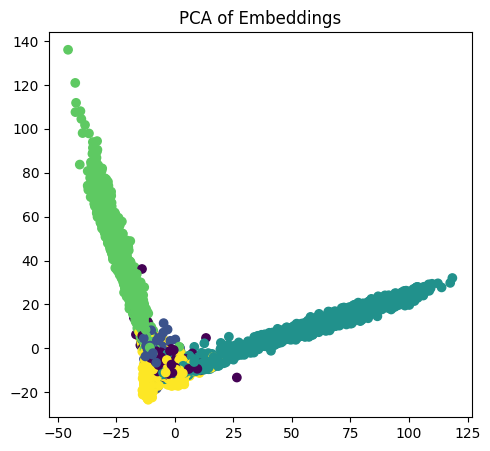

In [12]:
# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test)
plt.title('PCA of Embeddings')

## Insights from PCA

**Observations from PCA Analysis:**

- **Distinct Cluster Separation:** The scatter plot generated from PCA exhibits clear separations between clusters, indicating PCA's effectiveness in capturing data variances and revealing inherent patterns.
  
- **Color-coded Representation:** Utilizing different colors for each cluster enhances visual interpretation and facilitates quick identification of distinct groups within the dataset.
  
- **Diverse Spread of Groups:** The varying spread and size of clusters suggest a rich diversity of patterns within the data, underscoring the complexity inherent in the dataset.
  
- **Overall Effectiveness of PCA:** The PCA analysis effectively elucidates the primary differences among clusters, providing a concise visualization of the data distribution.


#### LDA

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique that aims to find the linear combinations of features that best separate different classes in the data. It differs from Principal Component Analysis (PCA) in that it considers class labels during the dimensionality reduction process.

In [13]:
lda = LDA(n_components=2)
lda_result = lda.fit_transform(embeddings, y_test)  # Requires class labels

The resulting `lda_result` contains the transformed embeddings in a lower-dimensional space, optimized for class separability.

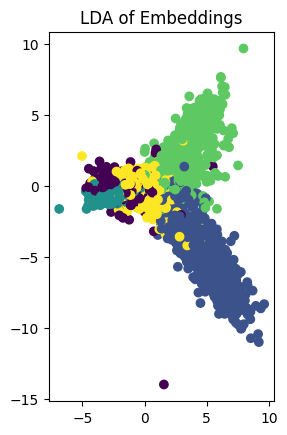

In [14]:
# Plotting
plt.subplot(1, 2, 2)
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_test)
plt.title('LDA of Embeddings')
plt.show()

## Insights from LDA

**Key Observations from LDA Analysis:**

- **Overlap in Clusters:** Unlike PCA, the LDA scatter plot displays instances of cluster overlap, implying similarities between certain groups and emphasizing LDA's focus on identifying discriminative features.
  
- **Utilization of Group Labels:** Leveraging group labels, LDA offers a different perspective compared to PCA, which primarily focuses on capturing variance.
  
- **Identification of Shared Characteristics:** The presence of overlapping areas suggests commonalities between clusters, hinting at potential shared traits or attributes that warrant further investigation.
  
- **LDA's Distinct Perspective:** LDA provides a unique viewpoint by emphasizing the differentiation between clusters, offering insights into the distinguishing features of each group.


### Interesting Patterns from Analysis of PCA and LDA Results

1. **PCA :** 
  - The images suggest that PCA has identified a primary axis of variance where one of the clusters is well separated from the others.
  - Better at highlighting variance and separation in the data due to its focus on capturing overall variance.

2. **LDA :**
  - On the other hand, the images from LDA indicate an attempt to separate clusters in a way that maximizes the difference between classes but results in more overlap.

  - More focused on class separability, may result in more overlap among clusters, depending on the inherent structure of the data.

<u>**Conclusion:**</u> The outcomes between PCA and LDA highlight the importance of understanding the underlying data structure when choosing dimensionality reduction techniques.


#### K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a predefined number of clusters. It aims to minimize the within-cluster variance, assigning each data point to the nearest cluster centroid.


In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)

The resulting `clusters` variable contains the cluster assignments for each data point, allowing for further analysis or interpretation of the grouping patterns in the data.

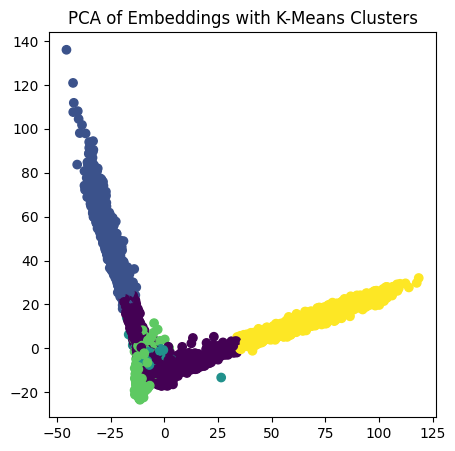

In [16]:
# Plot the PCA plot with K-Means cluster as colors
plt.figure(figsize=(5, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.title('PCA of Embeddings with K-Means Clusters')
plt.show()


## Insights from K-Means Clustering

**Key Observations:**

- **Different Cluster Shapes:** Clusters have different shapes, showing the diverse nature of the data.

- **Some Dense, Some Spread Out:** Some clusters are tightly packed, while others are more spread out, indicating variations within and between groups.

- **Dataset Structure:** The presence of distinct clusters suggests there's a structure in the data, revealing underlying patterns.

- **Thanks to K-Means:** The clear group separation is thanks to K-Means clustering, which has been effective in identifying distinct dataset groups.

### Reshaping the Data

In [17]:
x_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
x_test_images = x_test_array.reshape(-1, 28, 28)

1. **Conversion to NumPy Array**: (`x_test_array`) ensures uniform data handling.

2. **Reshaping**: The array (`x_test_array`) is reshaped into a 3D array (`x_test_images`), where each element represents an image. This transformation facilitates upcoming tasks which are visualization and model input preparation by arranging the data into the appropriate format.


### Visualising the Identified Samples

- Creating a grid of images arranged by class label.
- Randomly selecting samples for each class and displays them in the corresponding row.

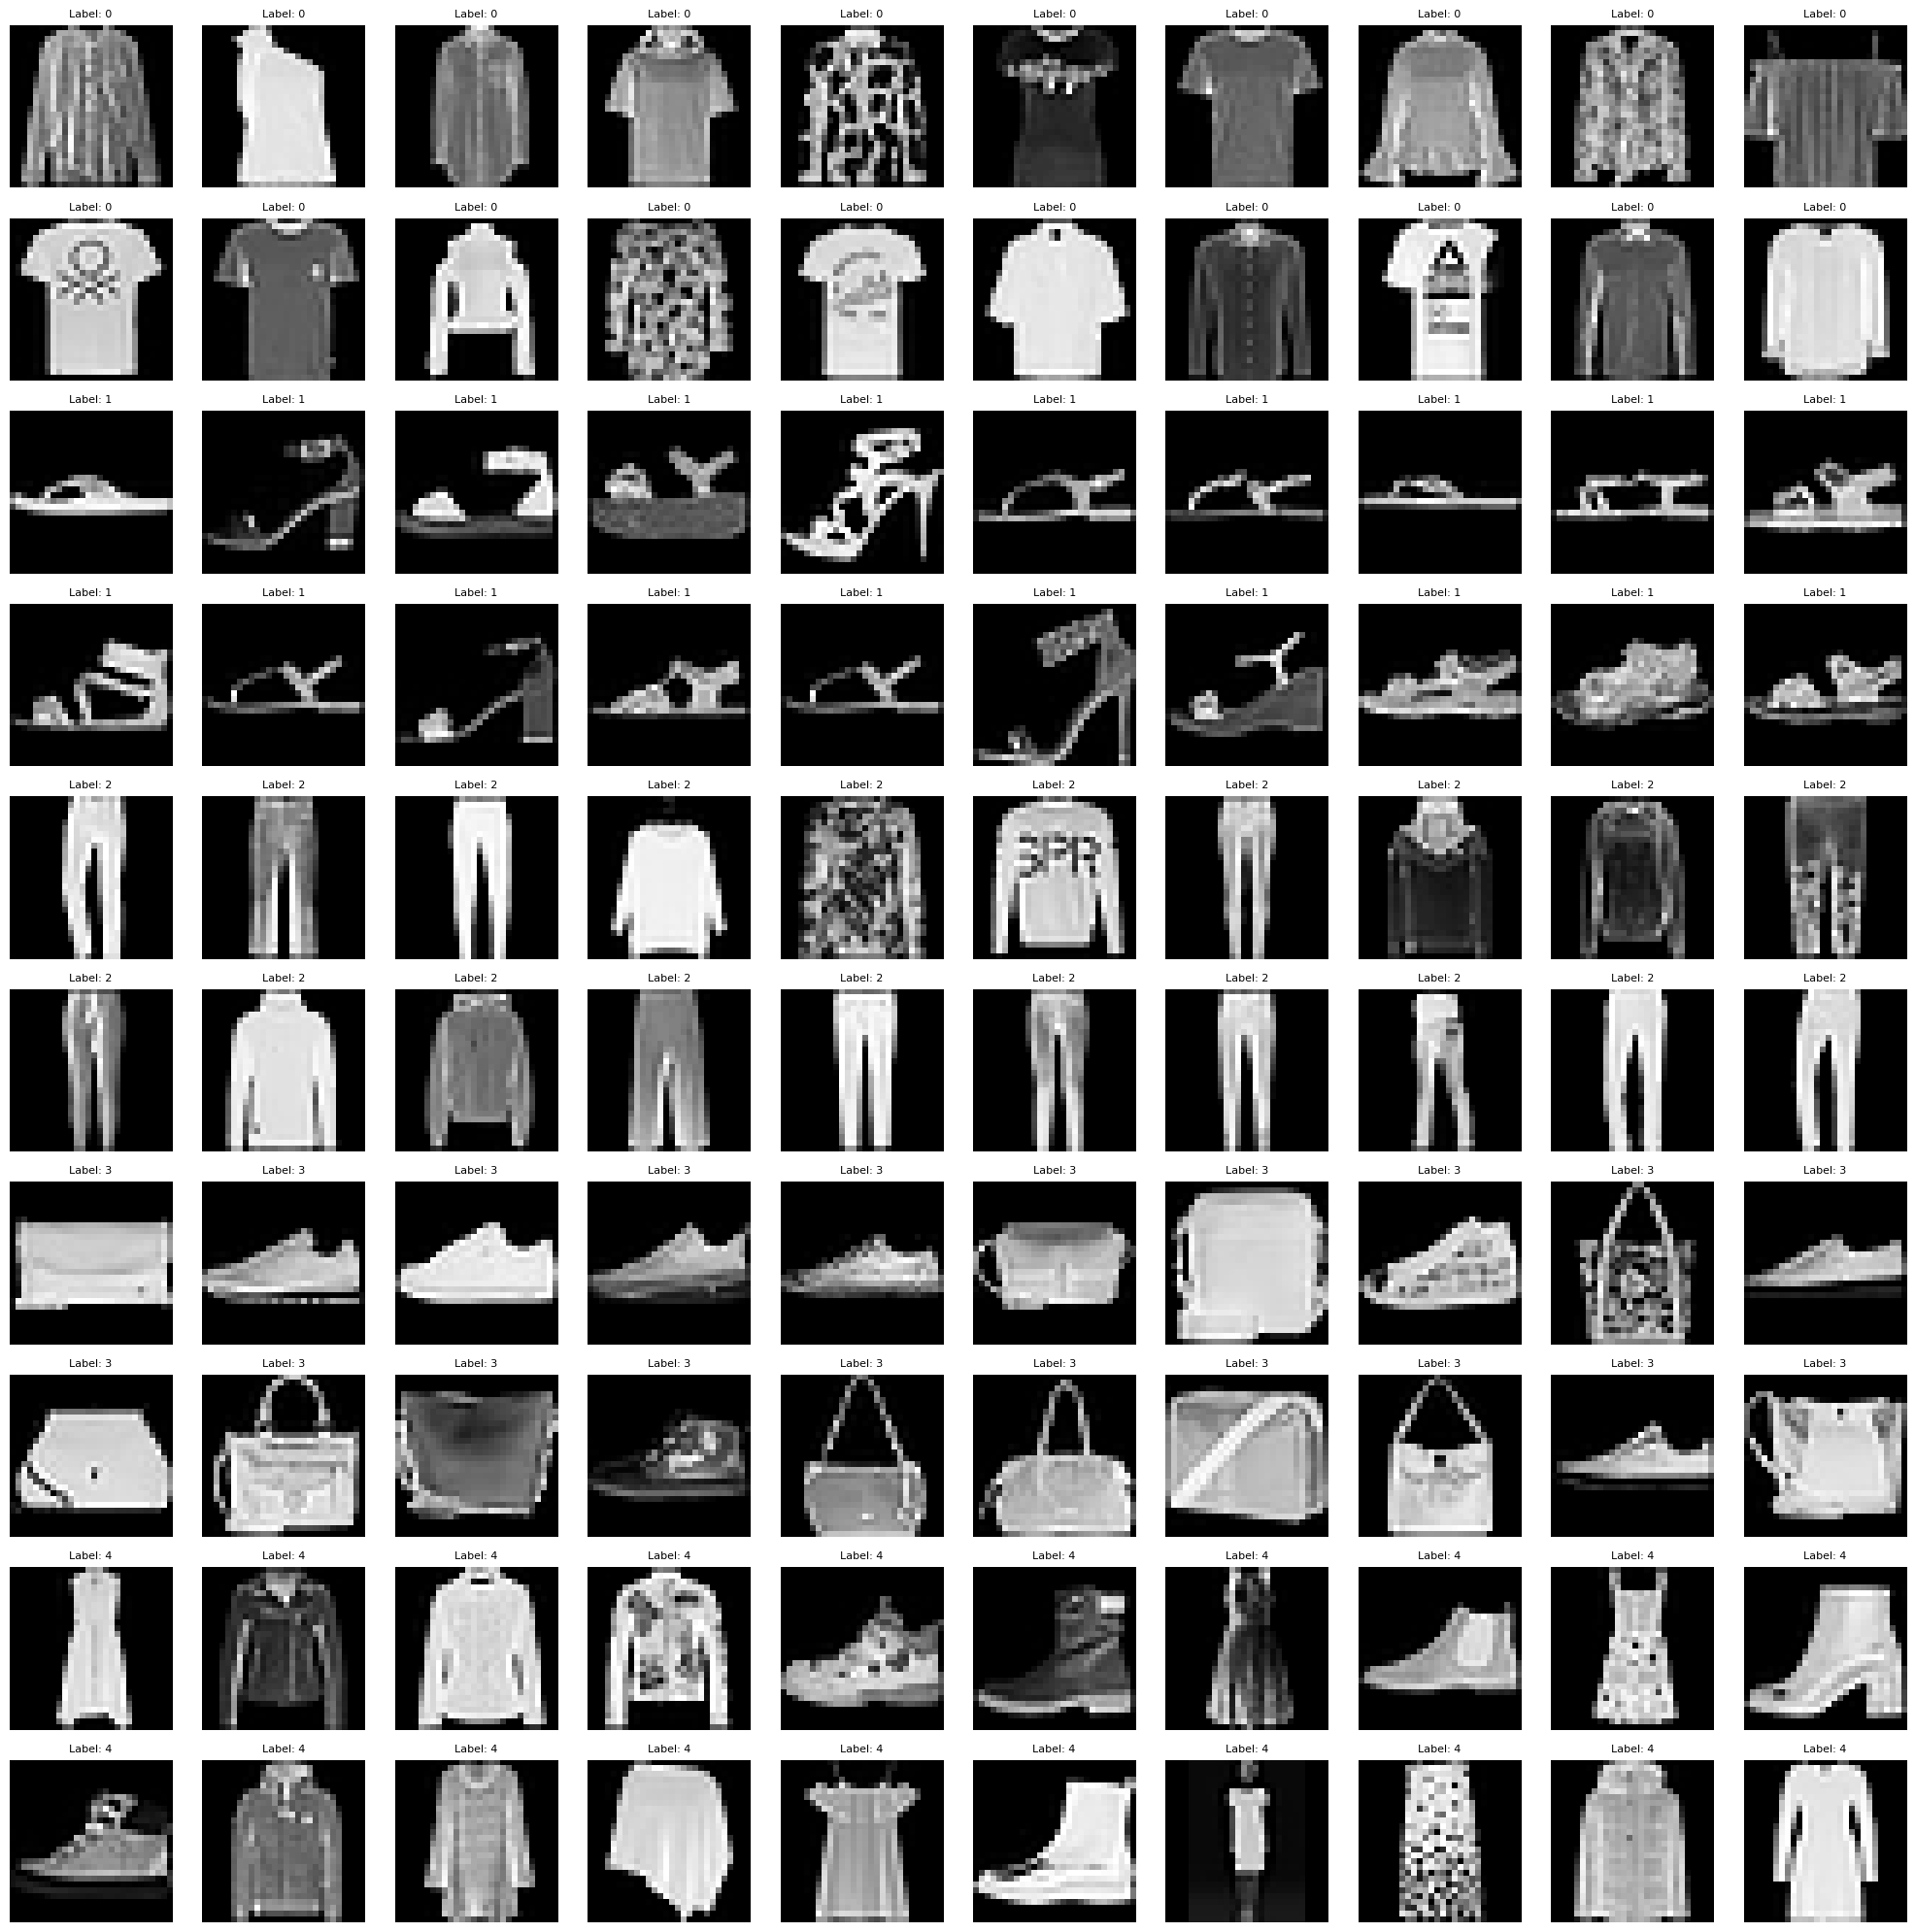

In [33]:
# Number of clusters (classes) and samples per cluster to display
num_clusters = 5
samples_per_cluster = 10

# Organize data by class
class_indices = {}
for class_label in range(5):
    class_indices[class_label] = np.where(y_test == class_label)[0]

# Create subplots to display images
fig, axs = plt.subplots(10, samples_per_cluster, figsize=(20, 20))

for i in range(5):  # iterate over class labels
    for j in range(samples_per_cluster):  # iterate over samples

        # Randomly select an index from the current class
        idx = np.random.choice(class_indices[i], 1)[0]
        image = x_test_images[idx].reshape(28, 28)

        # Display the image on the subplot and set title with the label
        axs[i*2, j].imshow(image, cmap='gray')
        axs[i*2, j].set_title(f'Label: {y_test[idx]}', fontsize=8)
        axs[i*2, j].axis('off')

        # Repeat the process for the second row of subplots
        idx = np.random.choice(class_indices[i], 1)[0]
        image = x_test_images[idx].reshape(28, 28)
        axs[i*2 + 1, j].imshow(image, cmap='gray')
        axs[i*2 + 1, j].set_title(f'Label: {y_test[idx]}', fontsize=8)
        axs[i*2 + 1, j].axis('off')

plt.tight_layout()
plt.show()


### Categories Overview

The visualisations are organized by labels, indicating different categories of fashion items:

- **Label 0:** Features various types of tops, like shirts and blouses.
- **Label 1:** Contains images of footwear, such as sandals and high heels.
- **Label 2:** Displays several styles of pullovers, sweaters, and track pants. - Indicates relax  fit clothing.
- **Label 3:** Showcases a range of bags, wallets and shoes. - Indicates Leather Items
- **Label 4:** Includes a mixture of various items such as shoes, jackets, tops, and dresses.

### Variety within Categories
Each category has a variety of styles within it, suggesting that a model trained on this dataset would learn to distinguish not just between different categories of items, but also between different styles within those categories. 

### Image Quality
The quality of the images is consistent, which is important for training a robust model. The grayscale format simplifies the learning task, as the model doesn't need to process color information, focusing instead on shapes and textures.


## Conclusion

### Insights from PCA
- **Distinct Cluster Separation**: The PCA analysis effectively captures data variances, revealing clear separations between clusters and inherent patterns.
- **Color-coded Representation**: Different colors for each cluster enhance visual interpretation, facilitating quick identification of distinct groups.
- **Diverse Spread of Groups**: The clusters' varying spread and size suggest a rich diversity of patterns within the data, highlighting its complexity.
- **Overall Effectiveness**: PCA provides a concise visualization of the data distribution, elucidating the primary differences among clusters.

### Insights from LDA
- **Overlap in Clusters**: The LDA scatter plot shows cluster overlap, implying similarities between groups and LDA's focus on discriminative features.
- **Utilization of Group Labels**: LDA offers a different perspective by leveraging group labels, unlike PCA's variance capture focus.
- **Identification of Shared Characteristics**: Overlapping areas suggest commonalities between clusters, hinting at potential shared traits.
- **LDA's Perspective**: By emphasizing differentiation between clusters, LDA provides unique insights into each group's distinguishing features.

### Interesting Patterns from PCA and LDA Analysis
- **PCA**: Identified a primary axis of variance with clear separation of one cluster from others, showcasing PCA's ability to highlight variance.
- **LDA**: Exhibits a distinct perspective by focusing on shared characteristics and discriminative features among clusters.

### Insights from K-Means Clustering
- **Identification of Core Clusters**: K-Means clustering successfully identifies core clusters that represent distinct categories within the dataset.
- **Visual Representations**: Cluster visualizations offer intuitive insights into the dataset's structure, aiding in the interpretation of clustering results.

### Categories Overview
- Categories are identified based on the clustering and analysis, including various types of fashion items like tops, footwear, and accessories. Each category showcases a diversity of styles, indicating the dataset's comprehensive coverage of fashion items.

### Variety within Categories
- A significant variety within categories suggests the potential for a model trained on this dataset to distinguish not just between different categories but also between styles within those categories.

Through various machine learning techniques like PCA, LDA, and K-Means Clustering, the analysis provides us with insights into the dataset's structure and patterns. The effectiveness of these methods allow us to develop robust models capable of recognizing and differentiating between various fashion items and styles.